In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Preparation

http://liyangbit.com/pythonvisualization/matplotlib-top-50-visualizations/


In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#warnings.filterwarnings(action='once')
warnings.simplefilter('ignore')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.3.2
0.11.0


C:\work2\anaconda3\envs\py38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 关联 (Correlation)
关联图表用于可视化2个或更多变量之间的关系。 也就是说，一个变量如何相对于另一个变化。

#### 散点图 (Scatter Plot)
散点图是用于研究两个变量之间关系的经典的和基本的图表。 
如果数据中有多个组，则可能需要以不同颜色可视化每个组。 
在 matplotlib 中，您可以使用 plt.scatterplot（） 方便地执行此操作。

In [32]:
# import dataset
midwest = pd.read_csv('./data/midwest_filter.csv')
print(midwest.isnull().count())
states = np.unique(midwest['state'])
print(states)
print(midwest.loc[midwest.state=='IN',['area','poptotal','category']])

PID                     332
county                  332
state                   332
area                    332
poptotal                332
popdensity              332
popwhite                332
popblack                332
popamerindian           332
popasian                332
popother                332
percwhite               332
percblack               332
percamerindan           332
percasian               332
percother               332
popadults               332
perchsd                 332
percollege              332
percprof                332
poppovertyknown         332
percpovertyknown        332
percbelowpoverty        332
percchildbelowpovert    332
percadultpoverty        332
percelderlypoverty      332
inmetro                 332
category                332
dot_size                332
dtype: int64
['IL' 'IN' 'MI' 'OH' 'WI']
      area  poptotal category
83   0.021     31095      AAU
84   0.022     63657      AAR
85   0.024      9441      AAR
86   0.010     14067      AA

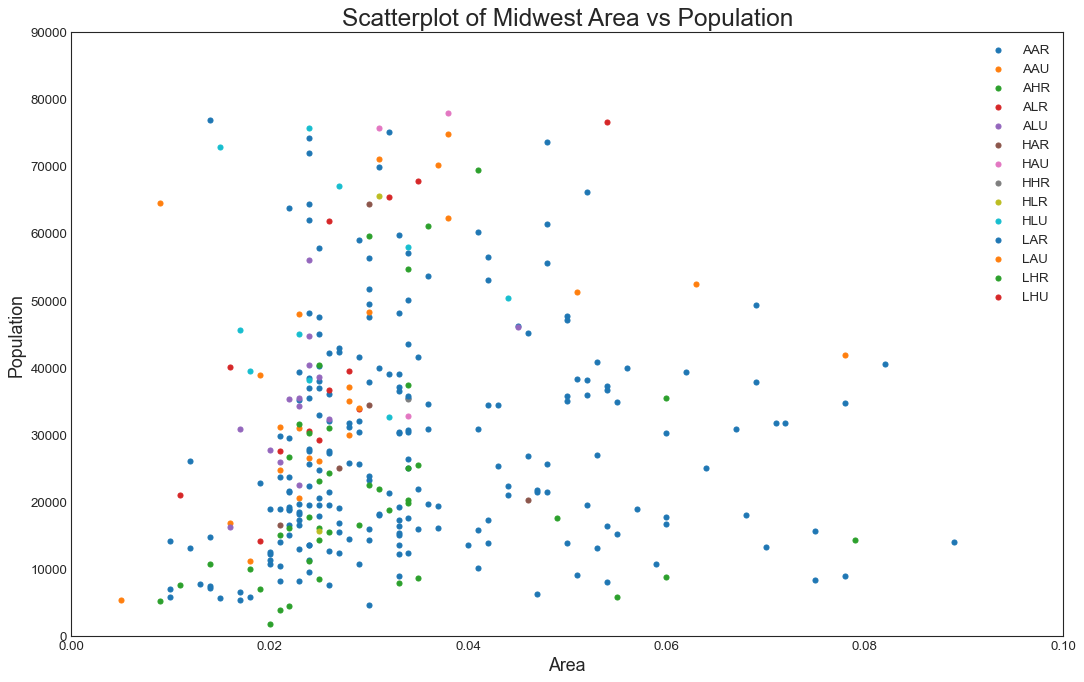

In [27]:
# prepare data
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, cmap=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()   

#### 带边界的气泡图 (Bubble plot with Encircling)
有时，希望在边界内显示一组点以强调其重要性。 在这个例子中，从数据框中获取记录，并用下面代码中描述的 encircle（） 来使边界显示出来。

In [ ]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("./data/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :],
                s='dot_size', cmap=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    